In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
import shap
%matplotlib inline


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lab: Use an Explainer Algorithm on Time Series
* read in data
* convert to labeled dataset 
* fit a model
* apply your explainer and interpret

1. Read in Data and Plot

In [6]:
##read data and plot
df = pd.read_csv('pricing_data.csv')

df.head()


,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


2. Transpose to Supervised Learning Problem by shifting backwards by 12mths
* essentially going to create features from our lag<br>
**A lag is a past time step’s value used as a predictive input in supervised modeling.
When converting time series to supervised format, lags become features, and the current or future value becomes the target.**

In [7]:
##assuming your data is in a pandas df called df:
##create the lag
df.set_index('Date', inplace =True)
lag = pd.DataFrame()
##set lag to 12 time steps (i.e could be months, etc)
t =12

for i in range(t,0,-1):
    lag['t-'+str(i)] = df.shift(i).values[:,0]
lag['t'] = df.values[:,0]
# print(lag.head(13))

lag


,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.730
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.730,34.730
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.730,34.730,34.730
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.730,34.730,34.730,34.730
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.730,34.730,34.730,34.730,34.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,1302.286,1287.650,1282.460,1358.488,1414.611,1497.102,1510.336,1494.765,1471.921,1480.025,1560.668,1598.818,1593.764
843,1287.650,1282.460,1358.488,1414.611,1497.102,1510.336,1494.765,1471.921,1480.025,1560.668,1598.818,1593.764,1680.030
844,1282.460,1358.488,1414.611,1497.102,1510.336,1494.765,1471.921,1480.025,1560.668,1598.818,1593.764,1680.030,1715.697
845,1358.488,1414.611,1497.102,1510.336,1494.765,1471.921,1480.025,1560.668,1598.818,1593.764,1680.030,1715.697,1734.032


5. Get X and y by using next time step as y
* if you recall models need features (X) and lable (y)
* we'll get that by setting Features to t and y to t+1

In [8]:
# using previous time steps as input variables and use the next time step as the output variable
X = lag.values[:,0:-1]
y = lag.values[:,-1]

6. Fit Regressor

In [9]:
##code to fit a regressor - feel free to sub with whatever you want
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

##optional - calcuate some accuracy metric

RandomForestRegressor(random_state=42)

7. Feature Importance
* use an explainer tool and interpret

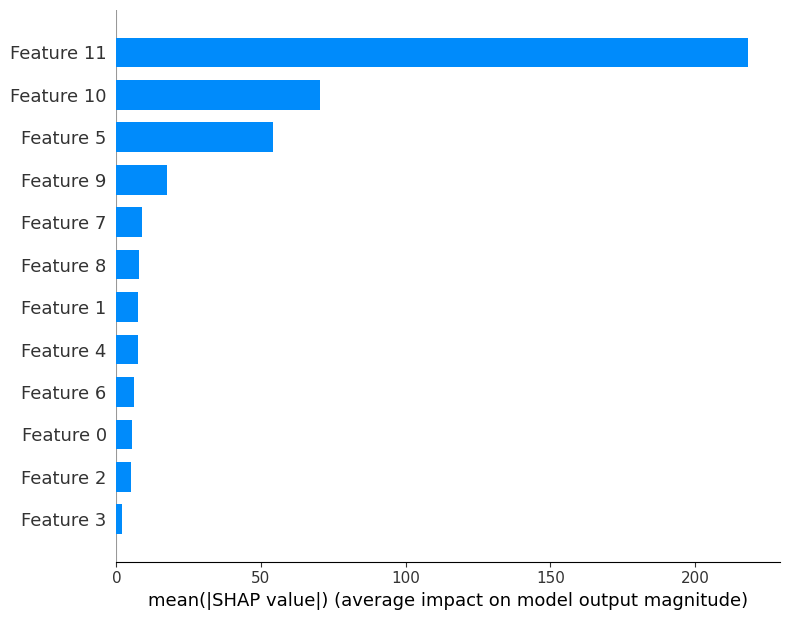

In [14]:
explainer = shap.TreeExplainer(rf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X)


shap.summary_plot(shap_values, X, plot_type='bar')